In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [211]:
# Define global variables
w0 = 0.0
w1 = 0.5
learning_rate = 0.01
epochs = 1000
train_loss = np.empty(1000)
test_loss = np.empty(1000)

# linear model
def linear_model(x, w0=0.0, w1=0.5):
    return w0 + w1 * x

In [3]:
# generate dataset
def get_label(x, sigma=0.5, mu=0.0):
    noise = sigma * np.random.randn(x.size) + mu
    return 2 * x + 3 + noise

def gen_dataset(N):
    x = np.random.uniform(low=0.0, high=2*math.pi, size=N)
    return x, get_label(x)

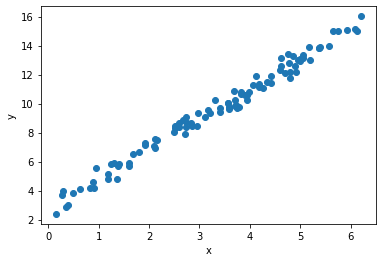

In [130]:
# generate training and testing set
x_train, y_train = gen_dataset(100)
x_test, y_test = gen_dataset(25)

# see data
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train, y_train, 'o')
plt.show()

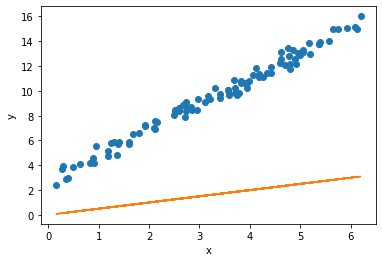

In [131]:
# initial model
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, linear_model(x_train))
plt.show()

In [212]:
# MSE
def obj(x, y_true):
    y_guess = linear_model(x, w0, w1)
    return (1 / 2) * (np.square(y_guess - y_true)).mean()

# Gradient
def grad_obj_w0(x, w0=0.0):
    dev_w0 = (linear_model(x, w0, w1) - get_label(x))
    return dev_w0

def grad_obj_w1(x, w1=0.5):
    dev_w1 = (linear_model(x, w0, w1) - get_label(x)) * x
    return dev_w1

# Adjust weights
# new = old - rate * avg_gradient
def adjust_param(x, w0=0.0, w1=0.5):
    w0_new = w0 - (learning_rate * (grad_obj_w0(x, w0))).mean()
    w1_new = w1 - (learning_rate * (grad_obj_w1(x, w1))).mean()
    return w0_new, w1_new

In [213]:
print("Loss before train: {}".format(obj(x_train, y_train)))

Loss before train: 34.54091784608741


Loss after epoch 1: 25.483710515844


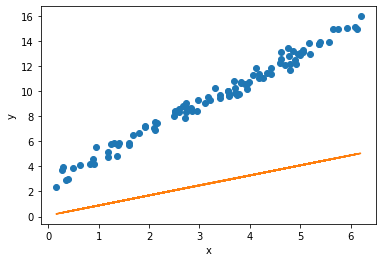

In [214]:
w0, w1 = adjust_param(x_train, w0, w1)
print("Loss after epoch 1: {}".format(obj(x_train, y_train)))

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, linear_model(x_train, w0, w1))
plt.show()

In [215]:
# Automated training

for i in range(epochs):
    w0, w1 = adjust_param(x_train, w0, w1)
    train_loss[i] = obj(x_train, y_train)
    test_loss[i] = obj(x_test, y_test)

Loss after epoch 1000: 0.08909266785803886


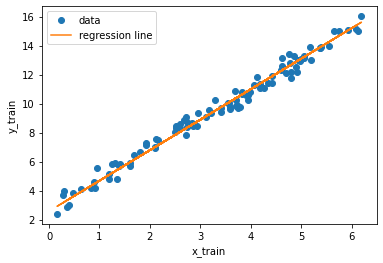

In [224]:
print("Loss after epoch 1000: {}".format(obj(x_train, y_train)))

plt.xlabel('x_train')
plt.ylabel('y_train')
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, linear_model(x_train, w0, w1))
plt.legend(['data', 'regression line'])
plt.show()

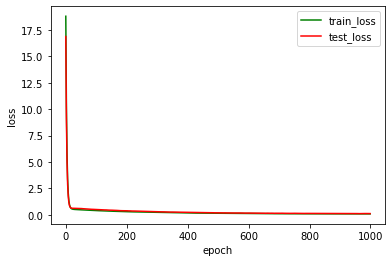

In [223]:
# Train and test loss plots
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(train_loss, color='green')
plt.plot(test_loss, color='red')
plt.legend(['train_loss', 'test_loss'])
plt.show()

In [227]:
print("w0: ", w0," w1: ", w1)

w0:  2.585412738224642  w1:  2.1024118546121375
